### Introduction to statistical learning with R done in Python

In [18]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import io
import statsmodels.api as sm
from statsmodels.formula.api import ols

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 100000000)
pd.set_option('display.max_columns', 100000000)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

### 3.6.2 Simple Linear Regression

The MASS library contains the Boston data set, which records medv (median
house value) for 506 neighborhoods around Boston. 

We will seek to predict
medv using 13 predictors such as rm (average number of rooms per house),
age (average age of houses), and lstat (percent of households with low
socioeconomic status).

In [19]:
path = 'C:/Users/Schindler/Downloads/Boston.csv'
data_Boston = pd.read_csv(path)
data_Boston = pd.DataFrame(data_Boston)
print(data_Boston.shape)
data_Boston.drop('Unnamed: 0', axis=1, inplace=True)
data_Boston.head()

(506, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


We will start by using the lm() function to fit a simple linear regression
lm()
model, with medv as the response and lstat as the predictor. The basic
syntax is lm(y∼x,data), where y is the response, x is the predictor, and
data is the data set in which these two variables are kept.

In [31]:
single_model = ols("medv ~ lstat", data=data_Boston).fit()
print(single_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        14:53:35   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

We will now plot medv and lstat along with the least squares regression
line using the plot() and abline() functions.

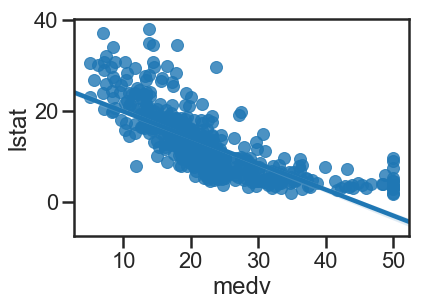

In [32]:
sns.regplot('medv', 'lstat', data=data_Boston, ci=68)

Next we examine some diagnostic plots, several of which were discussed
in Section 3.3.3. 

Four diagnostic plots are automatically produced by applying
the plot() function directly to the output from lm(). 

- residual vs x
- residual vs y

In [33]:
dir(single_model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


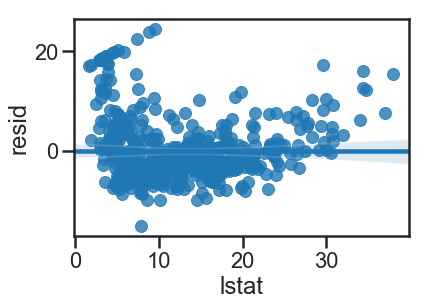

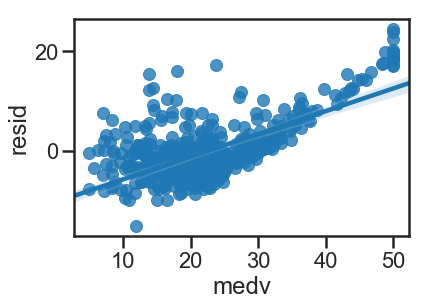

In [34]:
data_Boston['resid'] = single_model.resid
sns.regplot(x, 'resid', data=data_Boston)
plt.show()
sns.regplot(y, 'resid', data=data_Boston)
plt.show()

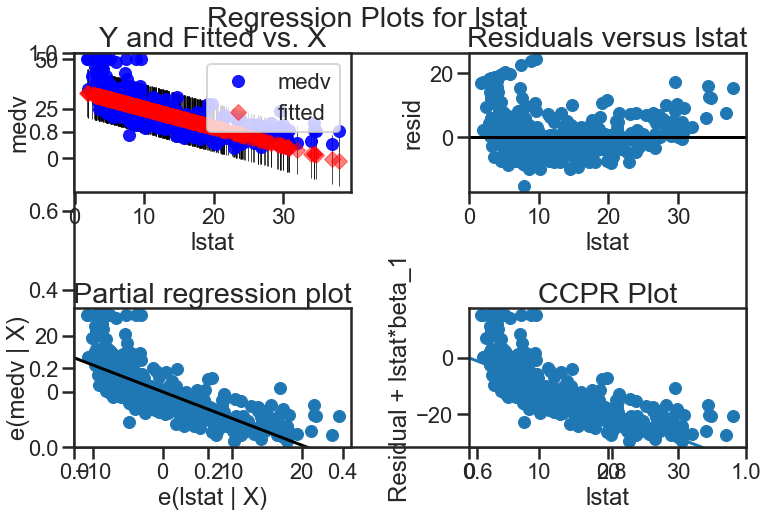

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(single_model, 'lstat', fig=fig)

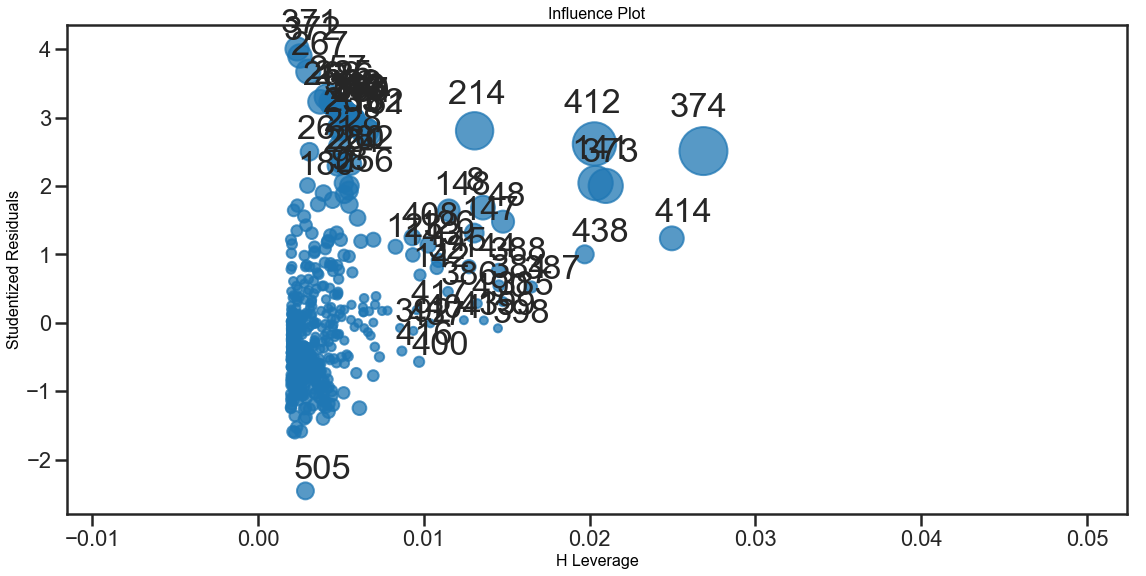

In [30]:
fig, ax = plt.subplots(figsize=(19,9))
fig = sm.graphics.influence_plot(reg_results, ax=ax, criterion="cooks")

### 3.6.3 Multiple Linear Regression
In order to fit a multiple linear regression model using least squares, we
again use the lm() function. The syntax lm(y∼x1+x2+x3) is used to fit a
model with three predictors, x1, x2, and x3. The summary() function now
outputs the regression coefficients for all the predictors.

In [43]:
mult_model = ols("medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+resid", data=data_Boston).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.650e+29
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:24:47   Log-Likelihood:                 14633.
No. Observations:                 506   AIC:                        -2.924e+04
Df Residuals:                     491   BIC:                        -2.917e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538   7.29e-14   4.74e+14      0.0

### 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the lm() function.
The syntax lstat:black tells R to include an interaction term between
lstat and black. The syntax lstat*age simultaneously includes lstat, age,
and the interaction term lstat×age as predictors; it is a shorthand for
lstat+age+lstat:age.

In [44]:
mult_model = ols("medv ~ lstat*age", data=data_Boston).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.86e-88
Time:                        16:26:52   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 3.6.5 Non-linear Transformations of the Predictors

The lm() function can also accommodate non-linear transformations of the
predictors. For instance, given a predictor X, we can create a predictor X2
using I(X^2). The function I() is needed since the ^ has a special meaning
I()
in a formula; wrapping as we do allows the standard usage in R, which is
to raise X to the power 2. We now perform a regression of medv onto lstat
and lstat2.

In [58]:
mult_model = ols("medv ~ lstat + (lstat**2)", data=data_Boston).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        16:34:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0